# `geopandas`

GeoPandas is a Python library that etends `pandas` library by adding support for geospatial data.

## Reproducible file paths

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt


To import our data we will first use the os package to create a reproducible file path:

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data\\gbif_sus_scrofa_california\\gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [ ]:
california_fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')

In [8]:
california = gpd.read_file(california_fp)
california.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrame
The core data structure in `GeoPandas` is the `geopandas.GeoDataFrame`. We can think of it as a `pandas.DataFrame` with a dedicated geometry column that can perform spatial operations.

The **geometry column** in a `geopandas.GeoDataFrame` holds the geometry (point, polygon, etc.) of each spatial feature. This geometry column is of type `geopandas.GeoSeries`. Columns in the `geopandas.GeoDataFrame` with attributes about the features are `pandas.Series` like in a regular pandas.DataFrame.

In [10]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [9]:
# Check the data type of the pigs dataframe 
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [11]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the `geom_type` attribute of a `geopandas.GeoDataFrame`:

In [12]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

In [14]:
california.geom_type

0    MultiPolygon
dtype: object

## CRS
Two other important attributes of a `geopandas.GeoDataFrame` are its coordinate reference system (CRS) and its extent.

We can think of the **coordinate reference system (CRS)** as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a `geopandas.GeoDataFrame` using the crs attribute:

In [15]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The CRS for our data is the World Geodetic System 1984 (WGS84), represented by the code EPSG:4326. It uses latitude and longitude in degrees to represent places on Earth. This is a very popular CRS, used by Google Earth, GPS systems, and many web-based mapping tools, including Google Maps and OpenStreetMap. We can obtain more information about our CRS by accessing other attributes:

In [16]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


## Extent
The **extent** of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.

We access the extent of a `geopandas.GeoDataFrame` using the total_bounds attribute:

In [17]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

These four numbers represent the `minx`, `miny`, `maxx`, `maxy` values for the bounds of the entire geo-dataframe.

In [19]:
# Print the CRS and extent of California state boundary
print(california.geom_type)

print(california.total_bounds)

0    MultiPolygon
dtype: object
[-124.48201686   32.52883674 -114.13122248   42.00950827]


## Data wrangling

GeoPandas is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pandas.DataFrame` to wrange `geopandas.GeoDataFrames`.

Example
We only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [20]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

We can use our usual data selection to get data from 2020 onwards:

In [21]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check length of original dataframe
print('Total number of observations: ' , len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ' , len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


## Create a map

### **plot()**
Similarly to a `pandas.DataFrame`, a `geopandas.GeoDataFrame` has a plot() method that we can call directly to create a quick view of our data. The geospatial information of the `geopandas.GeoDataFrame` will be used to create the axes of the plot.

Example
Let’s take a quick look at our recent pigs data:

<Axes: >

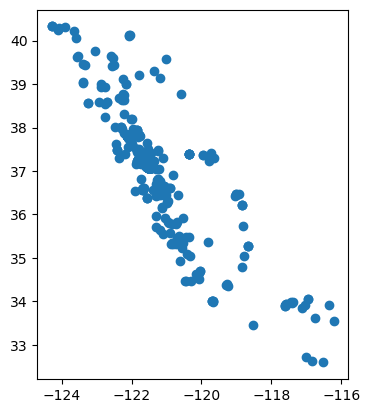

In [22]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`
Going forward, we will make more complex visualizations where we add different layers to a graph and customize it. To do this, we will use the `matplotlib` Python library for creating visualizations. We can interact with `matplotlib` via its pyplot interface, which we imported at the top of the notebook.

Matplotlib graphs the data in a **figure** which can have one or more **axes**. The axes is *only* the area specified by the $x$ axis and $y$ axis and what is plotted in it, while the figure can include multiple axes in it.

To create a new blank figure:

1. Initialize a new figure and axes by calling pyplot’s subplots() function
2. Display the figure using plt.show():

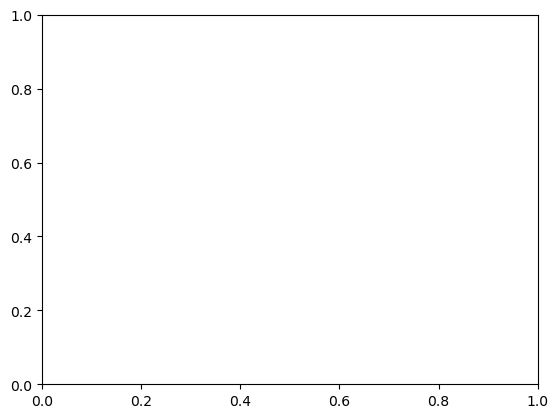

In [23]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display figure
plt.show()

Notice that `plt.subplots()` is a function that returns two objects, when we call it, we get a figure `fig` with a single empty axis `ax`. We can think of this step as setting a new blank canvas on which we will paint upon.

### Adding a layer
When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot data from a dataframe `df` onto an axis is:

```
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Plot df on the ax axis
df.plot(ax=ax,  # Add plot to axis
        ...)    # Other arguments for plot function

# Display figure
plt.show()
```

**Example**
The first layer that we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

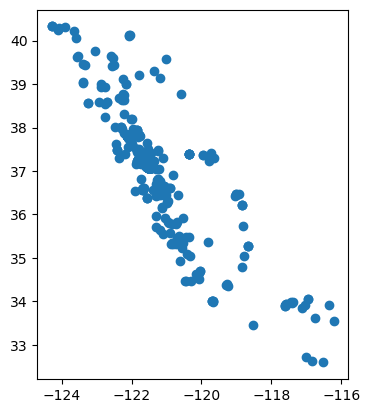

In [25]:
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

### Customization
Matplotlib allows for a lot of customization. Some of it can be done directly in the `plot()` method for the dataframe (like we’ve done when ploting data using `pandas`), while other is done by updating attributes of the `ax` axis. The following diagram shows some examples of elements in the axis that can be updated.

**Example**
Some basic customization for our pigs data could looke like this:

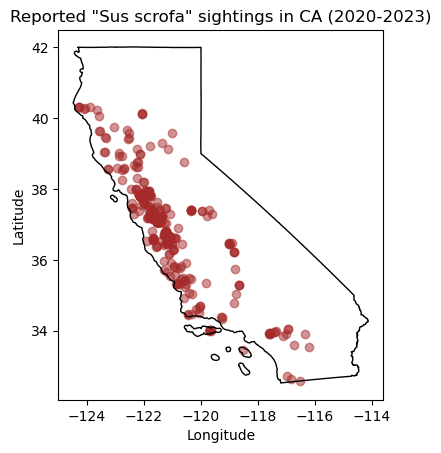

In [35]:
# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
california.boundary.plot(ax = ax, color = "black", linewidth = 1)

pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='brown'  # Update point color
                 )


# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()